In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import xgboost as xg
from sklearn import metrics

Data Collection and Pre-processing

In [ ]:
#load dataset
car_dataset = pd.read_csv('./content/car data.csv')

In [ ]:
#inspectt first 5 rows of dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# checking the number of rows and columns in the dataset
car_dataset.shape

(301, 9)

Our objective is to train our ML model with all the features such as selling price, km driven, number of previous owners, etc. Taking in =to account all these features the ML model will be able to predict the price of the car in the future.

Key_features that will affect actual selling price of vehicle:

1) Year:


If the car model is very old, it's price will be less, since vehicle parts will wear over time and new advancements in vehicle technology and fuel regulations (BS6, electric, etc). changes.

2) KM-driven:


How many kms driven will be a critical factor with which the model can predict the price of the vehicle, the more km driven, more its suspected that the engine efficiency will decrease, parts will wear, etc.



In [ ]:
#getting some info about the dataset
car_dataset.info()
car_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

After gathering more information on this dataset, it is observed that there are no missing values from this dataset.

Categorical features: Fuel_type, Seller_Type, Transmission

In [ ]:
#check the distribution of categorical data
print(car_dataset['Fuel_Type'].value_counts())
print()
print(car_dataset['Seller_Type'].value_counts())
print()
print(car_dataset['Transmission'].value_counts())
print()
print(car_dataset['Owner'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Manual       261
Automatic     40
Name: Transmission, dtype: int64

0    290
1     10
3      1
Name: Owner, dtype: int64


Encoding the Categorical Data: Since our ML model cannot understand text data, it is crucial to convert this categorical text values to numerical values

In our case:


Fuel Type: Petrol = 0, Diesel = 1, CNG = 2;

Seller_type: Dealer 0, Individual = 1;

Transmission: Manual = 0, Automatic = 1;

In [ ]:
#encoding Fuel_Type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding Seller_Type column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding Transmission column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Next step is to split the dataset into training and test data

In order to train our ML model, it is necessary to remove any unrelated/ unnessacary features from the dataset leaving only the crucial features that will affect selling price. In our case Car_name cannot be used for our predictive analysis

In [ ]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

Model Training

1. Linear Regression

In [ ]:
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#predicting with training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R mean squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R mean squared error: ", error_score)

R mean squared error:  0.8799451660493711


Next step is to plot and visualize the actual prices and predicted prices

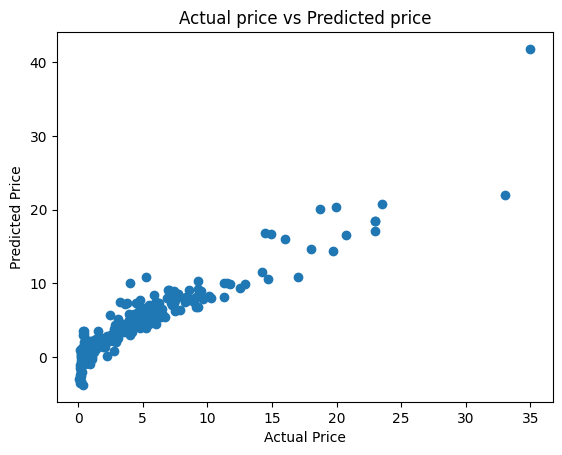

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

In [ ]:
#predicting with test data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# R mean squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R mean squared error: ", error_score)

R mean squared error:  0.8365766715027051


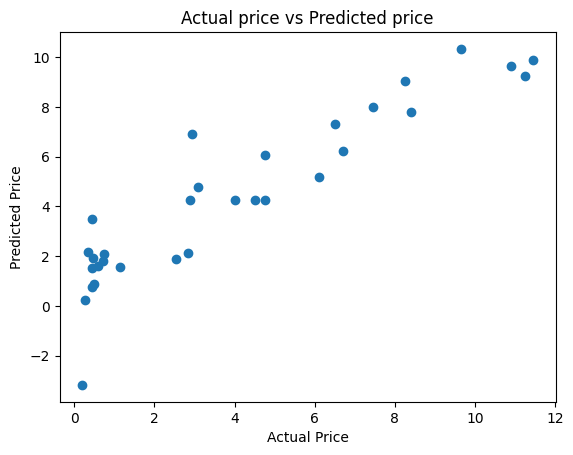

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

2. Lasso Regression

In [ ]:
lasso_reg_model = Lasso()

lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [ ]:
#predicting with training data
lasso_training_data_prediction = lasso_reg_model.predict(X_train)

In [ ]:
# R mean squared Error
error_score = metrics.r2_score(Y_train,lasso_training_data_prediction)
print("R mean squared error: ", error_score)

R mean squared error:  0.8427856123435794


Next step is to plot and visualize the actual prices and predicted prices

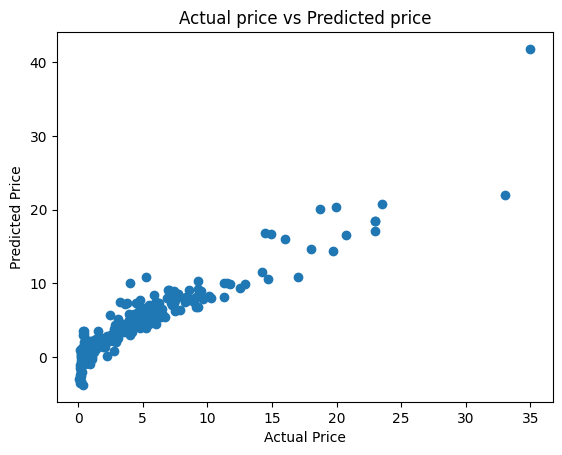

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

In [ ]:
#predicting with test data
lasso_test_data_prediction = lasso_reg_model.predict(X_test)

In [ ]:
# R mean squared Error
error_score = metrics.r2_score(Y_test,lasso_test_data_prediction)
print("R mean squared error: ", error_score)

R mean squared error:  0.8709167941173195


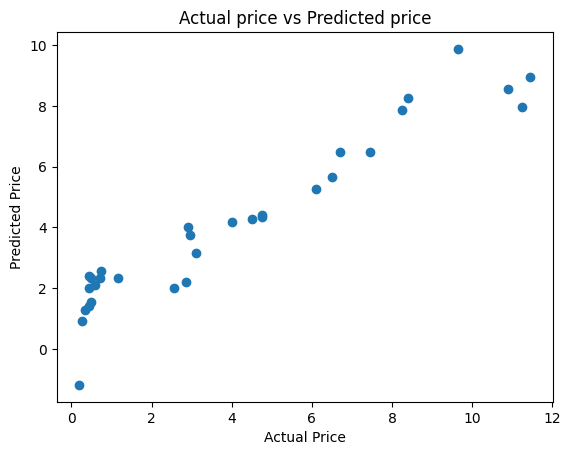

In [ ]:
plt.scatter(Y_test, lasso_test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

3. XGB regressor

In [ ]:
xgb_reg_model = xg.XGBRegressor(objective='reg:linear', n_estimators = 10, seed=123)
xgb_reg_model.fit(X_train,Y_train)

[06:32:20] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [ ]:
# Predict the model
xg_regress_prediction = xgb_reg_model.predict(X_train)

In [ ]:
# RMSE Computation
error_score = metrics.r2_score(Y_train, xg_regress_prediction)
print("RMSE : % f" %(error_score))

RMSE :  0.987531


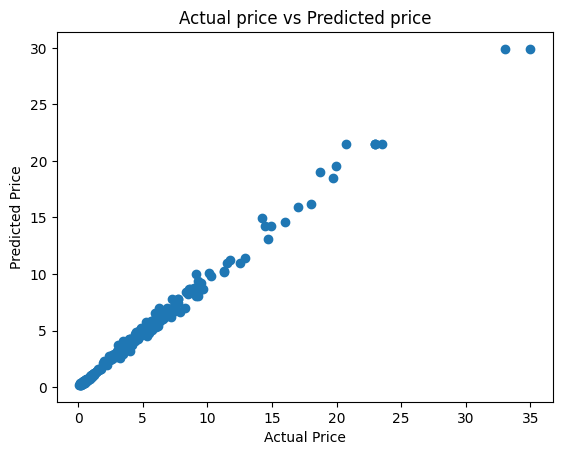

In [ ]:
plt.scatter(Y_train, xg_regress_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

Observation:

From the test reports, it is observed that xgb linear classifier has RSME value higher than Linear Reg and Lasso reg model.



Inference:
The hypothesis earlier was proven to be right that the crucial features in the dataset such as [], has a drastic affect in the selling price of the vehicle.